In [22]:
import pandas as pd
faang = pd.DataFrame()
for ticker in ['fb', 'aapl', 'amzn', 'nflx', 'goog']:
    df = pd.read_csv(f'./ch03_env/exercises/{ticker}.csv')
    # make the ticker the first column
    df.insert(0, 'ticker', ticker.upper())
    faang = faang.append(df)

faang.to_csv('faang.csv', index=False)
print(faang)

    ticker        date         high          low         open        close  \
0       FB  2018-01-02   181.580002   177.550003   177.679993   181.419998   
1       FB  2018-01-03   184.779999   181.330002   181.880005   184.669998   
2       FB  2018-01-04   186.210007   184.100006   184.899994   184.330002   
3       FB  2018-01-05   186.899994   184.929993   185.589996   186.850006   
4       FB  2018-01-08   188.899994   186.330002   187.199997   188.279999   
..     ...         ...          ...          ...          ...          ...   
246   GOOG  2018-12-24  1003.539978   970.109985   973.900024   976.219971   
247   GOOG  2018-12-26  1040.000000   983.000000   989.010010  1039.459961   
248   GOOG  2018-12-27  1043.890015   997.000000  1017.150024  1043.880005   
249   GOOG  2018-12-28  1055.560059  1033.099976  1049.619995  1037.079956   
250   GOOG  2018-12-31  1052.699951  1023.590027  1050.959961  1035.609985   

         volume  
0    18151900.0  
1    16886600.0  
2    1388

### Exercise 2
With faang, use type conversion to cast the values of the date column into
datetimes and the volume column into integers. Then, sort by date and ticker

In [31]:
faang = faang.assign(
    date=lambda x: pd.to_datetime(x.date),
    volume=lambda x: x.volume.astype(int)
)
faang.sort_values(
    ['date', 'ticker']
)

faang.head()

,ticker,date,high,low,open,close,volume
0,AAPL,2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600
0,AMZN,2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500
0,FB,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900
0,GOOG,2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600
0,NFLX,2018-01-02,201.649994,195.419998,196.100006,201.070007,10966900


### Exercise 3
 7 rows with the lowest value for volume.

In [32]:
faang.nsmallest(7, 'volume')

,ticker,date,high,low,open,close,volume
126,GOOG,2018-07-03,1135.819946,1100.020020,1135.819946,1102.890015,679000
226,GOOG,2018-11-23,1037.589966,1022.398987,1030.000000,1023.880005,691500
99,GOOG,2018-05-24,1080.469971,1066.150024,1079.000000,1079.239990,766800
130,GOOG,2018-07-10,1159.589966,1149.589966,1156.979980,1152.839966,798400
152,GOOG,2018-08-09,1255.541992,1246.010010,1249.900024,1249.099976,848600
159,GOOG,2018-08-20,1211.000000,1194.625977,1205.020020,1207.770020,870800
161,GOOG,2018-08-22,1211.839966,1199.000000,1200.000000,1207.329956,887400


### Exercise 4
 melt() to make it completely long format.
 

In [77]:
melt_faang = faang.melt(
    id_vars = ['date','ticker'], value_vars=['open','high','low','close','volume'],
    value_name='stock_price'
)
#open, high, low, close, and volume.
melt_faang.head()

,date,ticker,variable,stock_price
0,2018-01-02,AAPL,open,42.540001
1,2018-01-02,AMZN,open,1172.000000
2,2018-01-02,FB,open,177.679993
3,2018-01-02,GOOG,open,1048.339966
4,2018-01-02,NFLX,open,196.100006


### Exercise 5
 glitch on July 26th?

In [153]:
#melt_faang.columns
start_date = '2018-07-25'
end_date = '2018-07-27'

mask = (melt_faang['date']>= start_date) & (melt_faang['date']<= end_date)

melt_faang = melt_faang.loc[mask]
melt_faang.head(15)

,date,ticker,variable,stock_price
710,2018-07-26,AAPL,open,48.652500
711,2018-07-26,AMZN,open,1839.000000
712,2018-07-26,FB,open,174.889999
713,2018-07-26,GOOG,open,1251.000000
714,2018-07-26,NFLX,open,358.190002
1965,2018-07-26,AAPL,high,48.990002
1966,2018-07-26,AMZN,high,1844.680054
1967,2018-07-26,FB,high,180.130005
1968,2018-07-26,GOOG,high,1269.770996
1969,2018-07-26,NFLX,high,365.540009


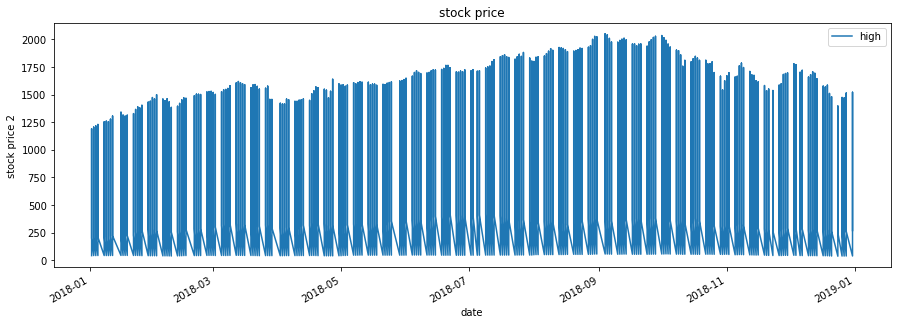

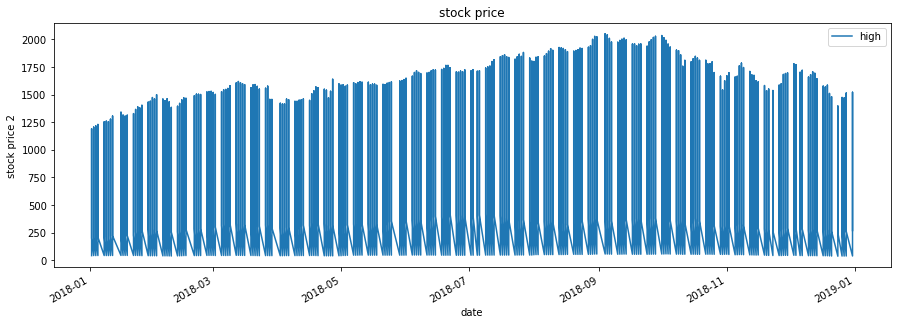

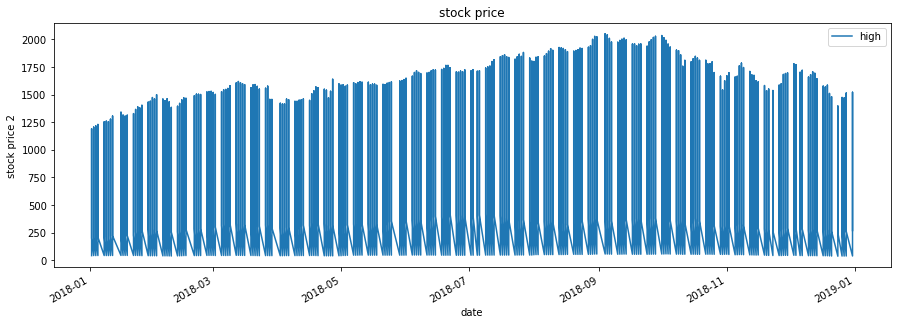

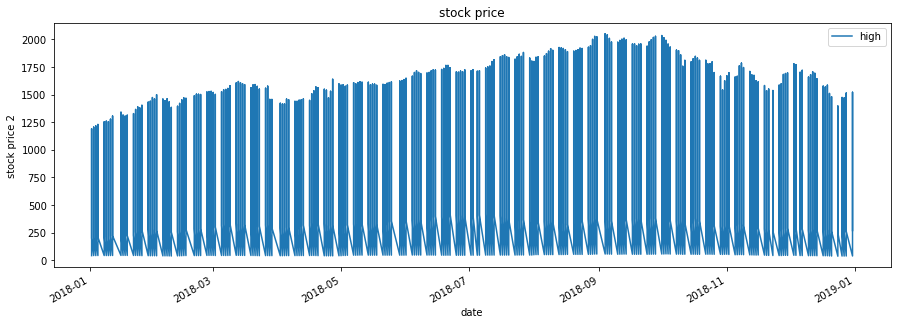

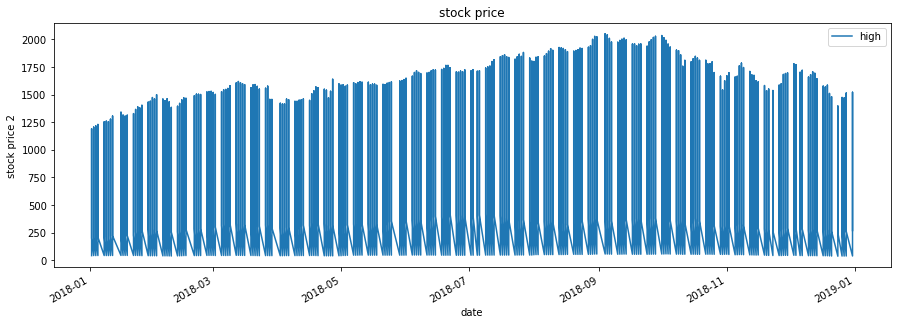

In [174]:
import matplotlib.pyplot as plt
for ticker in ['fb', 'aapl', 'amzn', 'nflx', 'goog']:
    faang.plot(
        x='date', y='high', figsize=(15, 5), 
        title='stock price'
    ).set_ylabel('stock price 2')
plt.show()

### Exercise 6
The European Centre for Disease Prevention and Control (ECDC) provides an open dataset on COVID-19 cases called, daily number of new reported cases of COVID-19 by country worldwide. This dataset is updated daily, but we will use a snapshot that contains data from January 1, 2020 through September 18, 2020. Clean and pivot the data so that it is in wide format:

Read in the covid19_cases.csv file.
Create a date column using the data in the dateRep column and the pd.to_datetime() function.
Set the date column as the index and sort the index.
Replace occurrences of United_States_of_America and United_Kingdom with USA and UK, respectively.
Using the countriesAndTerritories column, filter the data down to Argentina, Brazil, China, Colombia, India, Italy, Mexico, Peru, Russia, Spain, Turkey, the UK, and the USA.
Pivot the data so that the index contains the dates, the columns contain the country names, and the values are the case counts in the cases column. Be sure to fill in NaN values with 0.

In [180]:
covid = pd.read_csv('./ch03_env/exercises/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).replace('United_Kingdom', 'UK').sort_index()

covid[
    covid.countriesAndTerritories.isin([
        'Argentina', 'Brazil', 'China', 'Colombia', 'India', 'Italy', 
        'Mexico', 'Peru', 'Russia', 'Spain', 'Turkey', 'UK', 'USA'
    ])
].reset_index().pivot(index='date', columns='countriesAndTerritories', values='cases').fillna(0)

countriesAndTerritories,Argentina,Brazil,China,Colombia,India,Italy,Mexico,Peru,Russia,Spain,Turkey,UK,USA
date,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,10778.0,14768.0,29.0,7355.0,92071.0,1456.0,4408.0,6787.0,5449.0,27404.0,1527.0,3330.0,33871.0
2020-09-15,9056.0,15155.0,22.0,5573.0,83809.0,1008.0,3335.0,4241.0,5509.0,9437.0,1716.0,2621.0,34841.0
2020-09-16,9908.0,36653.0,24.0,6698.0,90123.0,1229.0,4771.0,4160.0,5529.0,11193.0,1742.0,3103.0,51473.0


### Exercise 7
In order to determine the case totals per country efficiently, we need the aggregation skills we will learn in Chapter 4, Aggregating DataFrames, so the ECDC data in the covid19_cases.csv file has been aggregated for us and saved in the covid19_total_cases.csv file. It contains the total number of case per country. Use this data to find the 20 countries with the largest COVID-19 case totals. 

When reading in the CSV file, pass in index_col='cases'.
Note that it will be helpful to transpose the data before isolating the countries.

In [183]:
pd.read_csv('./ch03_env/exercises/covid19_total_cases.csv', index_col='index')\
    .T.nlargest(20, 'cases').sort_values('cases', ascending=False)

index,cases
USA,6724667
India,5308014
Brazil,4495183
Russia,1091186
Peru,756412
Colombia,750471
Mexico,688954
South_Africa,657627
Spain,640040
Argentina,601700
